In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from topolib import gda_lib
from topolib import IceSat2Data
import getpass
from topolib import gda_lib
import glob
import matplotlib.pyplot as plt
import rasterio 
from rasterio import features

In [2]:
%matplotlib inline

In [23]:
# Earthdata Login credentials
# Enter your Earthdata Login user name
user_id = 'Shashank_17'
# Enter your email address associated with your Earthdata Login account
email = 'sbaglapl@uw.edu'
password = getpass.getpass('Earthdata Login password: ')

Earthdata Login password:  ·········


In [24]:
# Specify the variables of interest
variables = {
    'beams': [
        '/land_ice_segments/atl06_quality_summary',
        '/land_ice_segments/delta_time',
        '/land_ice_segments/h_li',
        '/land_ice_segments/h_li_sigma',
        '/land_ice_segments/latitude',
        '/land_ice_segments/longitude',
        '/land_ice_segments/segment_id',
        '/land_ice_segments/sigma_geo_h',
        '/ancillary_data/atlas_sdp_gps_epoch',
        '/land_ice_segments/ground_track/x_atc'
    ],
    'other': [
        '/orbit_info/cycle_number',
        '/orbit_info/rgt',
        '/orbit_info/orbit_number',
    ]
}
# Area of interest
boundaries = {
    'LowerLeft_Lon': '86.43596713164361',
    'LowerLeft_Lat': '26.965957751300405',
    'UpperRight_Lon': '88.22911222366918',
    'UpperRight_Lat': '29.03672631623175',
}
# Custom time range of interest
time_range = {
        'start_date': '2018-10-01',
        'end_date': '2019-03-01'
}

In [25]:
# Setup a search session
search = IceSat2Data(user_id, password, variables=variables)

In [8]:
# # Show available variables
# search.show_variables()

# # Show available formats
# search.show_formats()

In [26]:
# Submit a download order to NSIDC with no time restriction
search.order_data(
    email,
    '/home/jovyan/data/nepal_icesat/',
    boundaries,
)

# # Submit a download order to NSIDC with no time restriction
# search.order_data(
#     email,
#     '/home/jovyan/data/',
#     boundaries,
#     time_range=time_range    
# )

Number of granules:
    25
Average size of granules in MB:
    65.70044765472
Total size in MB:
    1642.5111913680003
Order:  1
Request HTTP response:  201
order ID:  5000000320471
Data request  1  is submitting...
Initial request status is  processing
Status is not complete. Trying again.
Retry request status is:  complete_with_errors
error messages:
['161155360:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 '161204636:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 '161172760:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 'PT3.025S',
 'ICESAT2']
Beginning download of zipped output...
Data request 1 is complete.
Order:  2
Request HTTP response:  201
order ID:  5000000320472
Data request  2  is submitting...
Initial request status is  processing
Status is not complete. Trying again.
Retry request status is:  complete
Beginning download of zipped output...
Data request 2 is com

In [4]:
hdf_fn_list = sorted(glob.glob('/home/jovyan/data/nepal_icesat/*/*.h5'))

In [5]:
dataset_dict = {'land_ice_segments':['h_li', 'delta_time','longitude','latitude','atl06_quality_summary'], 'land_ice_segments/ground_track':['x_atc']}

In [6]:
#add overview utility of rasterio

In [3]:
nepal_dem_fn = '/home/jovyan/data/wv_nepal_dem.vrt'
nepal_ds = rasterio.open(nepal_dem_fn)
nepal_dem = nepal_ds.read(1)
#oview = oviews[-1]
#nepal_dem_overview = nepal_ds.overviews(1)[0]
nepal_dem = np.ma.masked_equal(nepal_dem,gda_lib.get_ndv(nepal_ds))

In [31]:
nepal_dem

masked_array(data=32,
             mask=False,
       fill_value=-9999)

In [29]:
gdf_list = [gda_lib.ATL06_2_gdf(x,dataset_dict) for x in hdf_fn_list]

In [21]:
gdf_list[0].head()

,h_li,delta_time,longitude,latitude,atl06_quality_summary,pair,beam,p_b,geometry
0,NaN,2.543520e+07,86.842540,27.484628,1,1.0,0.0,1.0_0.0,POINT (86.84254016411816 27.48462779095918)
1,NaN,2.543520e+07,86.842521,27.484808,1,1.0,0.0,1.0_0.0,POINT (86.84252121338888 27.48480797416822)
2,NaN,2.543520e+07,86.842501,27.484988,1,1.0,0.0,1.0_0.0,POINT (86.84250126713103 27.48498807120726)
3,1926.680786,2.543520e+07,86.842481,27.485168,1,1.0,0.0,1.0_0.0,POINT (86.84248138657441 27.48516817318197)
4,NaN,2.543520e+07,86.842462,27.485348,1,1.0,0.0,1.0_0.0,POINT (86.84246218903448 27.4853483352613)


In [8]:
big_gdf = gda_lib.concat_gdf(gdf_list)

In [9]:
xmin,ymin,xmax,ymax = nepal_ds.bounds
big_gdf = big_gdf.to_crs(nepal_ds.crs)
big_gdf = big_gdf.cx[xmin:xmax,ymin:ymax]

In [11]:
xmin,ymin,xmax,ymax = nepal_ds.bounds

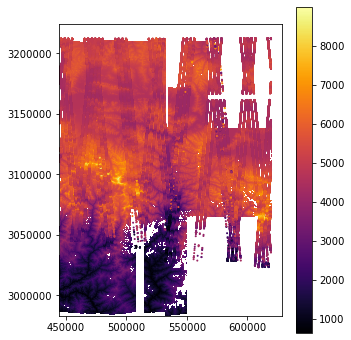

In [10]:
fig,ax = plt.subplots(figsize=(5,6))
im = ax.imshow(nepal_dem,cmap='inferno',extent=[xmin,xmax,ymin,ymax])
big_gdf.plot('h_li',legend=True,ax=ax,cmap='inferno',s=1)


In [9]:
big_gdf.head()

,h_li,delta_time,longitude,latitude,atl06_quality_summary,pair,beam,p_b,geometry
0,NaN,2.543520e+07,86.842540,27.484628,1,1.0,0.0,1.0_0.0,POINT (86.84254016411816 27.48462779095918)
1,NaN,2.543520e+07,86.842521,27.484808,1,1.0,0.0,1.0_0.0,POINT (86.84252121338888 27.48480797416822)
2,NaN,2.543520e+07,86.842501,27.484988,1,1.0,0.0,1.0_0.0,POINT (86.84250126713103 27.48498807120726)
3,1926.680786,2.543520e+07,86.842481,27.485168,1,1.0,0.0,1.0_0.0,POINT (86.84248138657441 27.48516817318197)
4,NaN,2.543520e+07,86.842462,27.485348,1,1.0,0.0,1.0_0.0,POINT (86.84246218903448 27.4853483352613)


In [11]:
good_idx = big_gdf['atl06_quality_summary']==0
big_gdf = big_gdf.loc[good_idx]

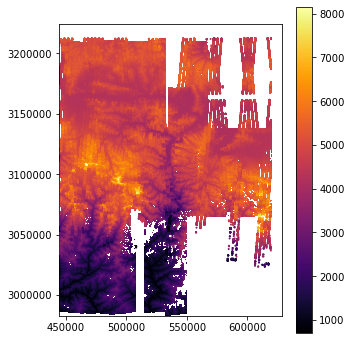

In [13]:
fig,ax = plt.subplots(figsize=(5,6))
im = ax.imshow(nepal_dem,cmap='inferno',extent=[xmin,xmax,ymin,ymax])
big_gdf.plot('h_li',legend=True,ax=ax,cmap='inferno',s=1)


In [ ]:
#filter out based on only good e

In [13]:
# big_gdf_mtr = big_gdf.to_crs({'init':'epsg:3857'})

In [9]:
#looks cool
rgi_fn = '/home/jovyan/data/15_rgi60_SouthAsiaEast.shp'
rgi_gdf = gpd.read_file(rgi_fn)
rgi_gdf = rgi_gdf.to_crs(nepal_ds.crs)  

In [12]:
rgi_gdf = rgi_gdf.cx[xmin:xmax,ymin:ymax]

In [18]:
#nepal_dem_overview = nepal_ds.overviews(1)
#nepal_dem = np.ma.masked_equal(nepal_dem_overview,gda_lib.get_ndv(nepal_ds))

In [47]:
rgi_gdf.head()

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
2696,RGI60-15.02697,G088184E27891N,20001108,-9999999,88.183836,27.890705,15,2,0.526,5512,...,90,1239,0,0,0,0,9,9,None,"POLYGON ((616219.5926108825 3085917.382008325,..."
2697,RGI60-15.02698,G088155E27898N,20001108,-9999999,88.155126,27.898019,15,2,11.710,5202,...,41,7398,0,0,0,0,9,9,None,"POLYGON ((617373.1781994069 3088393.886987086,..."
2698,RGI60-15.02699,G088130E27874N,20001108,-9999999,88.129556,27.873683,15,2,3.011,6798,...,206,2134,0,0,0,0,9,9,None,"POLYGON ((612141.9722504511 3083076.811996308,..."
2699,RGI60-15.02700,G088184E27900N,20001108,-9999999,88.183625,27.899983,15,2,0.313,5392,...,8,970,0,0,0,0,9,9,None,"POLYGON ((616267.4857814985 3086560.268525811,..."
2701,RGI60-15.02702,G088212E27830N,20001108,-9999999,88.212116,27.830231,15,2,2.076,5538,...,96,3344,0,0,0,0,9,9,None,"POLYGON ((618661.8986509817 3078555.724928125,..."


In [19]:
nepal_dem_overview

[]

In [35]:
nepal_dem

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-9999.0,
  dtype=float32)

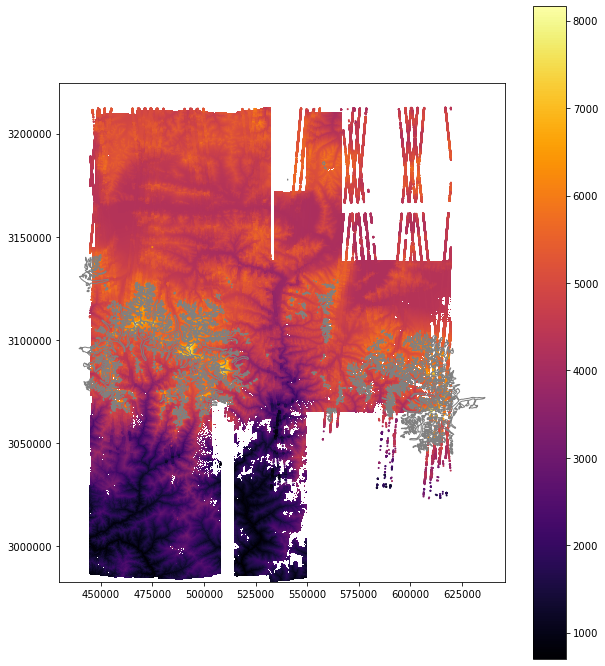

In [36]:
fig,ax = plt.subplots(figsize=(10,12))
#xmin,ymin,xmax,ymax = nepal_ds.bounds
im = ax.imshow(nepal_dem,cmap='inferno',extent=[xmin,xmax,ymin,ymax])
big_gdf.plot('h_li',legend=True,ax=ax,cmap='inferno',s=1)
rgi_gdf.plot(ax=ax,edgecolor='gray',facecolor='None')


In [ ]:
#sampled_gdf = gda_lib.buffer_sampler(nepal_ds,big_gdf,14,ret_gdf=True)

In [48]:

#Just use these columns from RGI
rgi_col = ['Area','RGIId','geometry']

In [49]:
glac_icesat2 = gpd.sjoin(big_gdf,rgi_gdf[rgi_col],op='intersects',how='inner')

In [50]:
glac_icesat2 = gda_lib.buffer_sampler(nepal_ds,glac_icesat2,14,ret_gdf=True)

In [51]:
#filter icesat2 polygons based on cloud
glac_icesat2.head()

,Area,RGIId,atl06_quality_summary,beam,delta_time,geometry,h_li,index_right,latitude,longitude,med,p_b,pair
0,2.757,RGI60-15.03741,0,0.0,2.543521e+07,"POLYGON ((481567.1278506737 3070113.667736726,...",5688.831543,3740,27.755331,86.812805,5689.084473,1.0_0.0,1.0
1,2.757,RGI60-15.03741,0,0.0,2.543521e+07,"POLYGON ((481565.247008206 3070133.624178662, ...",5683.313965,3740,27.755511,86.812786,5684.102051,1.0_0.0,1.0
2,2.757,RGI60-15.03741,0,0.0,2.543521e+07,"POLYGON ((481563.3619592602 3070153.581129991,...",5678.470215,3740,27.755691,86.812767,5679.666016,1.0_0.0,1.0
3,2.757,RGI60-15.03741,0,0.0,2.543521e+07,"POLYGON ((481561.4700794285 3070173.538327715,...",5674.227051,3740,27.755872,86.812747,5673.425537,1.0_0.0,1.0
4,2.757,RGI60-15.03741,0,1.0,2.543521e+07,"POLYGON ((481638.3729867208 3070201.070819436,...",5659.330078,3740,27.756121,86.813527,5660.101562,1.0_1.0,1.0


In [42]:
len(glac_icesat2)

21052

In [52]:
glac_icesat2['geometry'] = glac_icesat2.apply(gda_lib.point_covert,axis=1)

In [19]:
glac_icesat2.head()

,Area,Name,atl06_quality_summary,beam,delta_time,geometry,h_li,index_right,latitude,longitude,med,p_b,pair
0,2.757,None,0,0.0,2.543521e+07,POINT (86.81280536113411 27.75533118514391),5688.831543,3740,27.755331,86.812805,5689.084473,1.0_0.0,1.0
1,2.757,None,0,0.0,2.543521e+07,POINT (86.81278596669965 27.75551131747556),5683.313965,3740,27.755511,86.812786,5684.102051,1.0_0.0,1.0
2,2.757,None,0,0.0,2.543521e+07,POINT (86.81276652950532 27.75569145434028),5678.470215,3740,27.755691,86.812767,5679.666016,1.0_0.0,1.0
3,2.757,None,0,0.0,2.543521e+07,POINT (86.81274702292308 27.75587159332775),5674.227051,3740,27.755872,86.812747,5673.425537,1.0_0.0,1.0
4,2.757,None,0,1.0,2.543521e+07,POINT (86.81352699304456 27.75612119925232),5659.330078,3740,27.756121,86.813527,5660.101562,1.0_1.0,1.0


In [53]:
glac_icesat2['dh'] = glac_icesat2['med']-glac_icesat2['h_li']

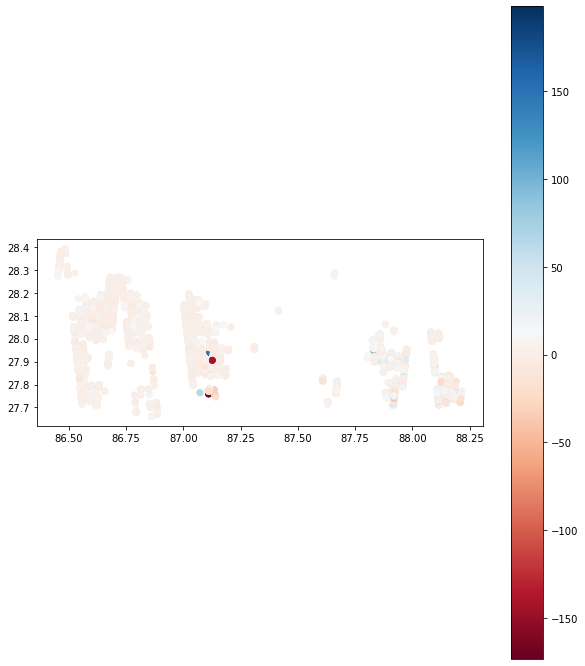

In [21]:
fig,ax = plt.subplots(figsize=(10,12))
glac_icesat2.plot('dh',cmap='RdBu',legend=True,ax=ax)
#ax.set_xlim((xmin,xmax))
#ax.set_ylim((ymin,ymax))

In [54]:
mean_dh = glac_icesat2['dh'].mean()
std_dh = glac_icesat2['dh'].std()
ul = mean_dh+3*std_dh
ll = mean_dh-3*std_dh
valid_dh_idx = (glac_icesat2['dh']<=ul) & (glac_icesat2['dh']>=ll)

In [55]:
glac_icesat2 = glac_icesat2[valid_dh_idx]

In [56]:
glac_icesat2.crs = {'init':'epsg:4326'}
glac_icesat2 = glac_icesat2.to_crs(nepal_ds.crs)

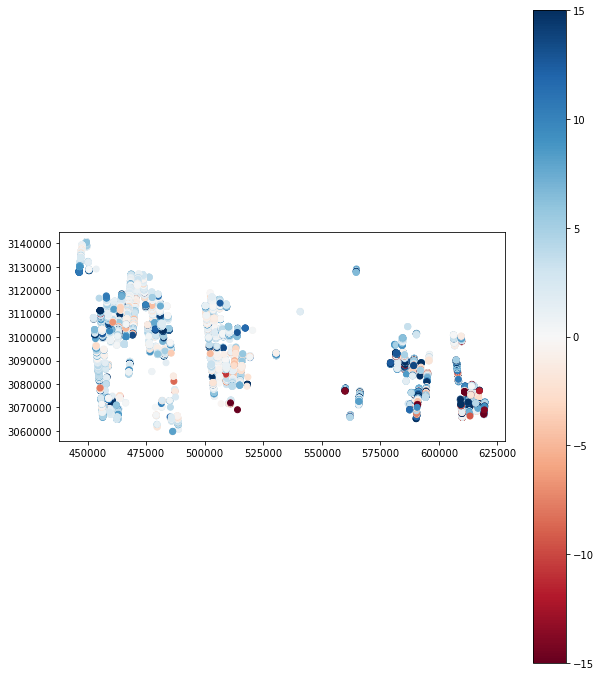

In [57]:
fig,ax = plt.subplots(figsize=(10,12))
glac_icesat2.plot('dh',cmap='RdBu',legend=True,ax=ax,vmin=-15,vmax=15)
#rgi_gdf.plot(ax=ax,edgecolor='black',facecolor='None')
#ax.set_xlim((xmin,xmax))
#ax.set_ylim((ymin,ymax))

In [58]:
glac_icesat2.head()

,Area,RGIId,atl06_quality_summary,beam,delta_time,geometry,h_li,index_right,latitude,longitude,med,p_b,pair,dh
0,2.757,RGI60-15.03741,0,0.0,2.543521e+07,POINT (481553.1278506737 3070113.667736727),5688.831543,3740,27.755331,86.812805,5689.084473,1.0_0.0,1.0,0.252930
1,2.757,RGI60-15.03741,0,0.0,2.543521e+07,POINT (481551.247008206 3070133.624178662),5683.313965,3740,27.755511,86.812786,5684.102051,1.0_0.0,1.0,0.788086
2,2.757,RGI60-15.03741,0,0.0,2.543521e+07,POINT (481549.3619592602 3070153.581129991),5678.470215,3740,27.755691,86.812767,5679.666016,1.0_0.0,1.0,1.195801
3,2.757,RGI60-15.03741,0,0.0,2.543521e+07,POINT (481547.4700794285 3070173.538327714),5674.227051,3740,27.755872,86.812747,5673.425537,1.0_0.0,1.0,-0.801514
4,2.757,RGI60-15.03741,0,1.0,2.543521e+07,POINT (481624.3729867208 3070201.070819436),5659.330078,3740,27.756121,86.813527,5660.101562,1.0_1.0,1.0,0.771484


In [65]:

agg_func = {'RGIId':'first',
            'Area':'first', 
            'dh':['mean', 'median', 'std']
            }#'glas_srtm_dhdt':['count','mean', 'median', 'std']

In [67]:
glac_icesat2_agg = glac_icesat2.groupby('RGIId').agg(agg_func)

In [70]:
glac_icesat2_agg.head()

RGIId    Area        dh                    
                         first   first      mean    median       std
RGIId                                                               
RGI60-15.02703  RGI60-15.02703  68.664  4.862019  4.455688  7.459231
RGI60-15.02790  RGI60-15.02790   1.919 -0.254531  0.789429  4.121167
RGI60-15.02791  RGI60-15.02791   0.786  1.515367  0.774902  9.542334
RGI60-15.02793  RGI60-15.02793   1.235 -9.334961 -9.334961       NaN
RGI60-15.02796  RGI60-15.02796   1.388 -3.892090 -7.917725  9.567381

In [71]:
glac_icesat2_agg.columns = ['_'.join(col).rstrip('_') for col in glac_icesat2_agg.columns.values]

In [72]:
glac_icesat2_agg.head()

,RGIId_first,Area_first,dh_mean,dh_median,dh_std
RGIId,,,,,
RGI60-15.02703,RGI60-15.02703,68.664,4.862019,4.455688,7.459231
RGI60-15.02790,RGI60-15.02790,1.919,-0.254531,0.789429,4.121167
RGI60-15.02791,RGI60-15.02791,0.786,1.515367,0.774902,9.542334
RGI60-15.02793,RGI60-15.02793,1.235,-9.334961,-9.334961,NaN
RGI60-15.02796,RGI60-15.02796,1.388,-3.892090,-7.917725,9.567381


In [75]:
rgi_gdf = rgi_gdf.set_index('RGIId')

In [76]:
glac_icesat2_agg_gdf = gpd.GeoDataFrame(glac_icesat2_agg, geometry=rgi_gdf['geometry'])

In [77]:
glac_icesat2_agg_gdf.head()

,RGIId_first,Area_first,dh_mean,dh_median,dh_std,geometry
RGIId,,,,,,
RGI60-15.02703,RGI60-15.02703,68.664,4.862019,4.455688,7.459231,"POLYGON ((623318.7233427659 3076306.795301778,..."
RGI60-15.02790,RGI60-15.02790,1.919,-0.254531,0.789429,4.121167,"POLYGON ((610426.4573932835 3066334.908607475,..."
RGI60-15.02791,RGI60-15.02791,0.786,1.515367,0.774902,9.542334,"POLYGON ((609595.6640354921 3067155.118588985,..."
RGI60-15.02793,RGI60-15.02793,1.235,-9.334961,-9.334961,NaN,"POLYGON ((612094.7145081578 3065987.65615369, ..."
RGI60-15.02796,RGI60-15.02796,1.388,-3.892090,-7.917725,9.567381,"POLYGON ((609292.3794503824 3071168.98392022, ..."


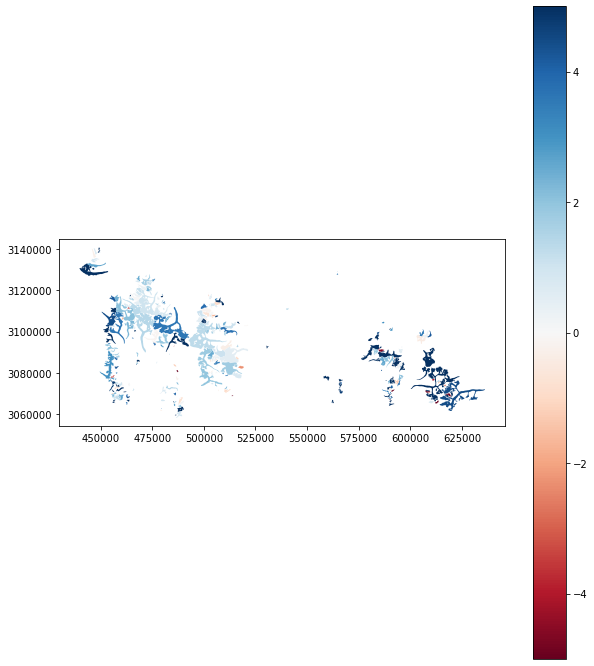

In [81]:
fig,ax = plt.subplots(figsize=(10,12))
glac_icesat2_agg_gdf.plot('dh_median',ax=ax,cmap='RdBu',legend=True,vmin=-5,vmax=5)

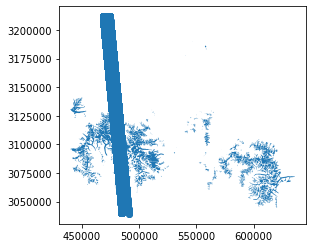

In [90]:
fig,ax=plt.subplots()
gdf_list[0].to_crs(nepal_ds.crs).plot(ax=ax)
rgi_gdf.plot(ax=ax)

In [13]:
def mask_by_shp(geom,array,ds,reverse=False): 
    if (type(ds) == rasterio.io.DatasetReader):
        transform = ds.transform
    else:
        transform = affine.Affine.from_gdal(*ds.GetGeoTransform())
    shp = features.rasterize(geom,out_shape=np.shape(array),fill=-9999,transform=transform,dtype=float)
    shp_mask = np.ma.masked_where(shp==-9999,shp)
    if reverse:
        req_mask = ~shp_mask.mask
    else:
        req_mask = shp_mask.mask
    masked_array = np.ma.array(array,mask=req_mask)
    return masked_array

In [14]:
nepal_dem_non_glac = mask_by_shp(rgi_gdf.geometry,nepal_dem,nepal_ds,reverse=True)

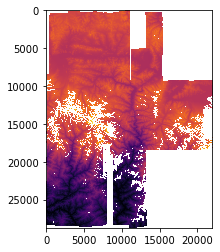

In [15]:
fig,ax = plt.subplots()
ax.imshow(nepal_dem_non_glac,cmap='inferno')

In [6]:
working_gdf = (gda_lib.ATL06_2_gdf(hdf_fn_list[0],dataset_dict)).to_crs(nepal_ds.crs)

In [7]:
working_gdf_beams = [x for x_,x in working_gdf.groupby(working_gdf['p_b'])]

In [20]:
working_gdf_beams[0].head()

,h_li,delta_time,longitude,latitude,atl06_quality_summary,pair,beam,p_b,geometry
0,NaN,2.543520e+07,86.842540,27.484628,1,1.0,0.0,1.0_0.0,POINT (484445.1090934022 3040123.947060534)
1,NaN,2.543520e+07,86.842521,27.484808,1,1.0,0.0,1.0_0.0,POINT (484443.2623330777 3040143.907808473)
2,NaN,2.543520e+07,86.842501,27.484988,1,1.0,0.0,1.0_0.0,POINT (484441.3172223791 3040163.859137196)
3,1926.680786,2.543520e+07,86.842481,27.485168,1,1.0,0.0,1.0_0.0,POINT (484439.3786093027 3040183.811005251)
4,NaN,2.543520e+07,86.842462,27.485348,1,1.0,0.0,1.0_0.0,POINT (484437.5074836393 3040203.769446151)


In [33]:
%matplotlib widget

Text(0.5, 0.98, 'Buffer sampling with window radius of 14 m')

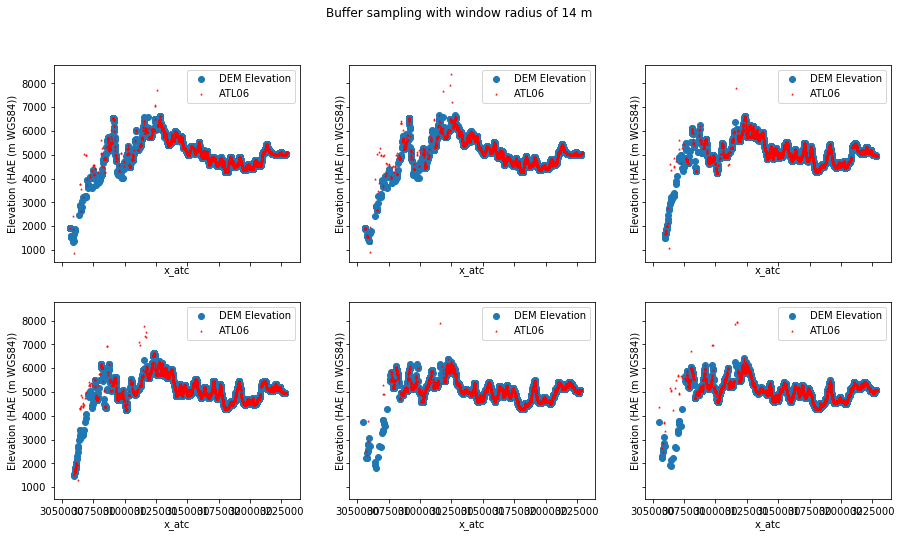

In [10]:
fig,axs = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
for i,ax in enumerate(fig.axes):
    x_atc,z_hp = gda_lib.buffer_sampler(nepal_ds,working_gdf_beams[i],14) #this is buffer sampling
    ax.scatter(x_atc,z_hp,label='DEM Elevation')
    ax.scatter(working_gdf_beams[i].x_atc.values,working_gdf_beams[i].h_li.values,marker='^',c='red',s=1,label='ATL06') 
    ax.legend()   
    ax.set_ylabel('Elevation (HAE (m WGS84))')
    ax.set_xlabel('x_atc')
plt.suptitle('Buffer sampling with window radius of 14 m')

Text(0.5, 0.98, 'Buffer sampling with window radius of 14 m')

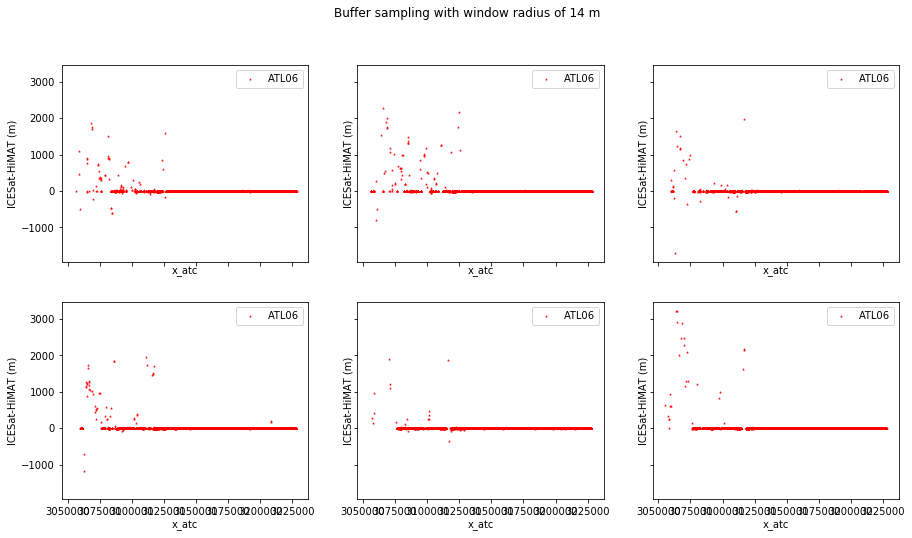

In [12]:
fig,axs = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
for i,ax in enumerate(fig.axes):
    gdf_out = gda_lib.buffer_sampler(nepal_ds,working_gdf_beams[i],14,ret_gdf=True) #this is buffer sampling
    gdf_out['dh'] = gdf_out['h_li']-gdf_out['med']
    #ax.scatter(x_atc,z_hp,label='DEM Elevation')
    ax.scatter(gdf_out.x_atc.values,gdf_out.dh.values,marker='^',c='red',s=1,label='ATL06') 
    ax.legend()   
    ax.set_ylabel('ICESat-HiMAT (m)')
    ax.set_xlabel('x_atc')
plt.suptitle('Buffer sampling with window radius of 14 m')

Text(0.5, 0.98, 'Buffer sampling with window radius of 14 m')

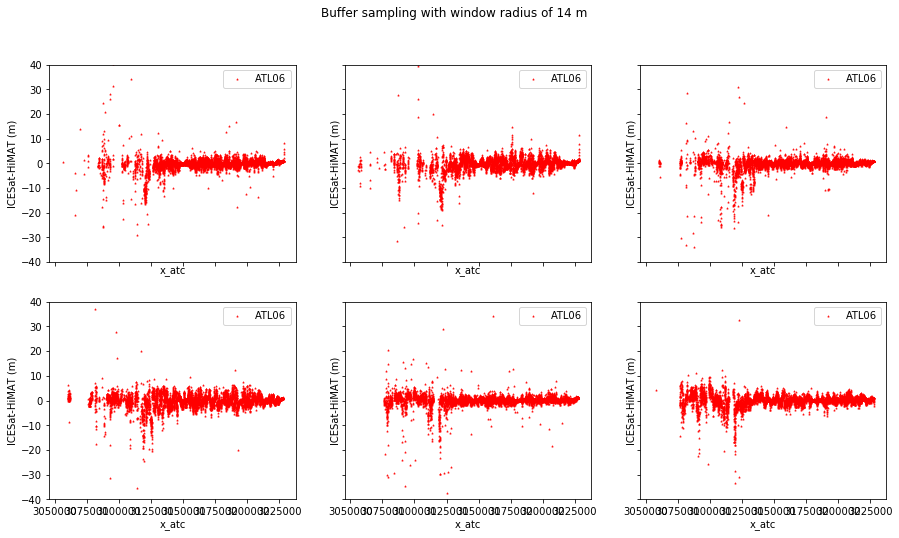

In [13]:
fig,axs = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
for i,ax in enumerate(fig.axes):
    gdf_out = gda_lib.buffer_sampler(nepal_ds,working_gdf_beams[i],14,ret_gdf=True) #this is buffer sampling
    gdf_out['dh'] = gdf_out['h_li']-gdf_out['med']
    #ax.scatter(x_atc,z_hp,label='DEM Elevation')
    ax.scatter(gdf_out.x_atc.values,gdf_out.dh.values,marker='^',c='red',s=1,label='ATL06') 
    ax.legend()   
    ax.set_ylabel('ICESat-HiMAT (m)')
    ax.set_xlabel('x_atc')
    ax.set_ylim((-40,40))
plt.suptitle('Buffer sampling with window radius of 14 m')

In [14]:

working_gdf = (gda_lib.ATL06_2_gdf(hdf_fn_list[0],dataset_dict)).to_crs(nepal_ds.crs)
good_idx = working_gdf['atl06_quality_summary']==0
working_gdf = working_gdf.loc[good_idx]
#working_gdf = working_gdf

Text(0.5, 0.98, 'Buffer sampling with window radius of 14 m (Filtered on quality flag)')

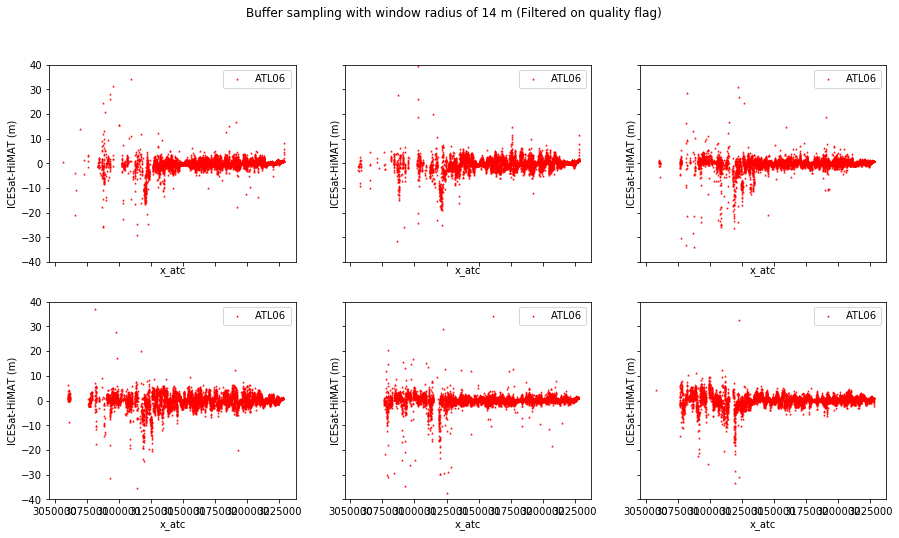

In [15]:
fig,axs = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
for i,ax in enumerate(fig.axes):
    gdf_out = gda_lib.buffer_sampler(nepal_ds,working_gdf_beams[i],14,ret_gdf=True) #this is buffer sampling
    gdf_out['dh'] = gdf_out['h_li']-gdf_out['med']
    #ax.scatter(x_atc,z_hp,label='DEM Elevation')
    ax.scatter(gdf_out.x_atc.values,gdf_out.dh.values,marker='^',c='red',s=1,label='ATL06') 
    ax.legend()   
    ax.set_ylabel('ICESat-HiMAT (m)')
    ax.set_xlabel('x_atc')
    ax.set_ylim((-40,40))
plt.suptitle('Buffer sampling with window radius of 14 m (Filtered on quality flag)')

Text(0.5, 0.98, 'Buffer sampling with window radius of 14 m (Filtered on quality flag)')

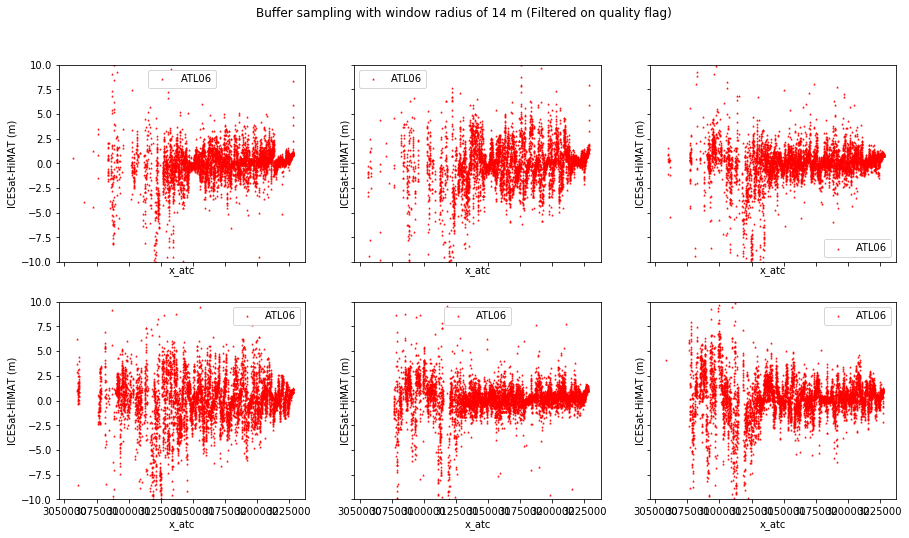

In [16]:
fig,axs = plt.subplots(2,3,figsize=(15,8),sharex=True,sharey=True)
for i,ax in enumerate(fig.axes):
    gdf_out = gda_lib.buffer_sampler(nepal_ds,working_gdf_beams[i],14,ret_gdf=True) #this is buffer sampling
    gdf_out['dh'] = gdf_out['h_li']-gdf_out['med']
    #ax.scatter(x_atc,z_hp,label='DEM Elevation')
    ax.scatter(gdf_out.x_atc.values,gdf_out.dh.values,marker='^',c='red',s=1,label='ATL06') 
    ax.legend()   
    ax.set_ylabel('ICESat-HiMAT (m)')
    ax.set_xlabel('x_atc')
    ax.set_ylim((-10,10))
plt.suptitle('Buffer sampling with window radius of 14 m (Filtered on quality flag)')